<a href="https://colab.research.google.com/github/crooba/LSTM1/blob/master/LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

one hot encoding vector size is  6
epochs : 0
Epoch 1/1
 - 1s - loss: 1.6600 - acc: 0.4500
epochs : 1
Epoch 1/1
 - 0s - loss: 1.5433 - acc: 0.4500
epochs : 2
Epoch 1/1
 - 0s - loss: 1.3855 - acc: 0.4500
epochs : 3
Epoch 1/1
 - 0s - loss: 1.3975 - acc: 0.4500
epochs : 4
Epoch 1/1
 - 0s - loss: 1.3530 - acc: 0.4500
epochs : 5
Epoch 1/1
 - 0s - loss: 1.3414 - acc: 0.4500
epochs : 6
Epoch 1/1
 - 0s - loss: 1.3354 - acc: 0.4500
epochs : 7
Epoch 1/1
 - 0s - loss: 1.2762 - acc: 0.5000
epochs : 8
Epoch 1/1
 - 0s - loss: 1.4025 - acc: 0.3000
epochs : 9
Epoch 1/1
 - 0s - loss: 1.3263 - acc: 0.4500
epochs : 10
Epoch 1/1
 - 0s - loss: 1.2102 - acc: 0.4500
epochs : 11
Epoch 1/1
 - 0s - loss: 1.4529 - acc: 0.4500
epochs : 12
Epoch 1/1
 - 0s - loss: 1.3876 - acc: 0.4000
epochs : 13
Epoch 1/1
 - 0s - loss: 1.3399 - acc: 0.4500
epochs : 14
Epoch 1/1
 - 0s - loss: 1.2497 - acc: 0.4500
epochs : 15
Epoch 1/1
 - 0s - loss: 1.2049 - acc: 0.4500
epochs : 16
Epoch 1/1
 - 0s - loss: 1.1787 - acc: 0.4500
epochs

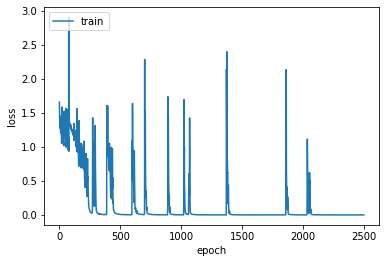

20/20 [==============================] - 0s 21ms/step
acc: 100.00%
one step prediction :  ['g4', 'g4', 'a4', 'a4', 'g4', 'g4', 'e4', 'g4', 'g4', 'e4', 'e4', 'd4', 'g4', 'g4', 'a4', 'a4', 'g4', 'g4', 'e4', 'g4', 'e4', 'd4', 'e4', 'c4']
full song prediction :  ['g4', 'g4', 'a4', 'a4', 'g4', 'g4', 'e4', 'g4', 'g4', 'e4', 'e4', 'd4', 'g4', 'g4', 'a4', 'a4', 'g4', 'g4', 'e4', 'g4', 'e4', 'd4', 'e4', 'c4']


In [6]:

# 1.패키지들을 불러옵니다.
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드를 임의의 수로 고정시킵니다 : 훈련의 일관성을 위해 일정한 기준값을 설정해주는 메서드입니다.
np.random.seed(7)

# loss값의 변화이력을 저장라는 클래스입니다.
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성하는 함수입니다.
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])            
            dataset_X.append(features)

        dataset_Y.append([code2idx[subset[window_size]]])
        
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수 : 기존에 하나의 묶음화 되어 있던 계이름과 음정길이를 나누어서 데이터로 만듭니다.
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

# 1. 데이터 준비하기

# 코드 사전 정의

#솔=a 솔=a 라=a 라=a 솔=e 솔=e 미=e 솔=g 솔=g 미=e 미=e 레=d  솔=g 솔=g  라=a 라=a 솔=g 솔=g 미=e 솔=g 미=e 레=d 미 도=c
code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}



idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0
    
# 시퀀스 데이터 정의
seq = ['g4', 'g4', 'a4', 'a4', 'g4', 'g4', 'e4', 'g4', 'g4', 'e4', 'e4', 'd4',  
       'g4', 'g4', 'a4', 'a4', 'g4', 'g4', 'e4', 'g4', 'e4', 'd4', 'e4', 'c4']

# 2. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size = 4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (20, 4, 2))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)#라벨값 변환  ex){1,2,3} -->{[1,0,0],[0,1,0],[0,0,1]}

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2500

history = LossHistory() # 손실 이력 객체 생성
history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
# %matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 20 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g4', 'g4', 'a4', 'a4']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

model.reset_states()

# 곡 전체 예측

seq_in = ['g4', 'g4', 'a4', 'a4']
seq_out = seq_in

seq_in_featrues = []

for si in seq_in:
    features = code2features(si)
    seq_in_featrues.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)